# **Food Vision** 🍔 

This is an **end-to-end CNN Image Classification Model** which identifies the food in your image.

I worked out with a pretrained Image Classification Model (**EfficientNetB1**) that comes with Keras and then retrained it on the infamous **Food101 Dataset**.


> **Dataset :** `Food101`

> **Model :** `EfficientNetB1`





## **Setting up the Workspace**

* Checking the GPU
* Importing Tensorflow
* Importing other required Packages

### **Checking the GPU**

For this Project we will working with **Mixed Precision**. And mixed precision works best with a with a GPU with compatibility capacity **7.0+**.

At the time of making this model my GPU is **RTX 3050 4GBvRam** with **75W TPU**

You can use **Google Colab** as well.
Make sure to change the runtime type to either:
* T4 GPU
* A100 GPU
* L4 GPU
* v2-8 TPU

Run the below cell to see which GPU is allocated to you.

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3050 Laptop GPU (UUID: GPU-44093b30-bdf3-5ae0-00d8-cccd0bde85ea)


### **Importing Tensorflow**

For this project I am using TensorFlow 2.13.1 which compartible with my GPU and it's CUDA and cuDNN version.

You can use latest/older versions as well.

Make sure your CUDA and cuDNN supports the TensorFlow version you are using.

In [2]:
import tensorflow as tf
print(tf.__version__)

2024-12-28 23:33:53.737623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.1


### **Importing other required Packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow_datasets as tfds
import seaborn as sn

#### **Importing `helper_fuctions`**

The `helper_functions.py` is a python script created by me. Which has some important functions I use frequently while building Deep Learning Models.

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
from helper_functions import plot_loss_curves, load_and_prep_image



7[https://raw.githubusercontent.]87helper_functions.py. 100% [=============================>]    3.48K    --.-KB/s87[Files: 1  Bytes: 3.48K [17.34K]8

## **Getting the Data Ready**

The Dataset used is **Food101**, which is available on both Kaggle and Tensorflow. 

In the below cells we will be importing Datasets from `Tensorflow Datasets` Module.


In [5]:
# Prints list of Datasets avaible in Tensorflow Datasets Module

dataset_list = tfds.list_builders()
dataset_list[:10]

2024-12-28 23:33:58.212223: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews']

### **Importing Food101 Dataset**

**Disclaimer :** 
The below cell will take time to run, as it will be downloading (I had it already downloaded :) thats why it didn't took me anytime)

**4.65GB data** from **Tensorflow Datasets Module**. 

So do check if you have enough **Disk Space** and **Bandwidth Cap** to run the below cell.

In [6]:
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             shuffle_files=False,
                                             as_supervised=True,
                                             with_info=True)

2024-12-28 23:34:01.821369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-28 23:34:01.872929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-28 23:34:01.877714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## **Becoming One with the Data**

One of the most important steps in building any ML or DL Model is to **become one with the data**. 

Once you get the gist of what type of data your dealing with and how it is structured, everything else will fall in place.

In [7]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [8]:
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [9]:
train_one_sample = train_data.take(1)

In [10]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
for image, label in train_one_sample:
  print(f"""
  Image Shape : {image.shape}
  Image Datatype : {image.dtype}
  Class : {class_names[label.numpy()]}
  """)


  Image Shape : (512, 512, 3)
  Image Datatype : <dtype: 'uint8'>
  Class : huevos_rancheros
  


In [12]:
image[:2]

<tf.Tensor: shape=(2, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]]], dtype=uint8)>

In [13]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

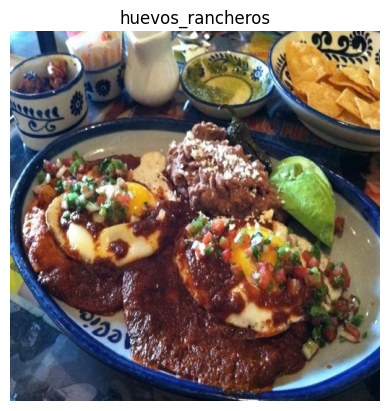

In [14]:
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## **Preprocessing the Data**

Since we've downloaded the data from TensorFlow Datasets, there are a couple of preprocessing steps we have to take before it's ready to model. 

More specifically, our data is currently:

* In `uint8` data type
* Comprised of all differnet sized tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

Whereas, models like data to be:

* In `float32` data type
* Have all of the same size tensors (batches require all tensors have the same shape, e.g. `(224, 224, 3)`)
* Scaled (values between 0 & 1), also called normalized

To take care of these, we'll create a `preprocess_img()` function which:

* Resizes an input image tensor to a specified size using [`tf.image.resize()`](https://www.tensorflow.org/api_docs/python/tf/image/resize)
* Converts an input image tensor's current datatype to `tf.float32` using [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast)

In [15]:
def preprocess_img(image, label, img_size=224):
  image = tf.image.resize(image, [img_size, img_size])
  image = tf.cast(image, tf.float16)
  return image, label

In [16]:
# Trying the preprocess function on a single image

preprocessed_img = preprocess_img(image, label)[0]
preprocessed_img

<tf.Tensor: shape=(224, 224, 3), dtype=float16, numpy=
array([[[230.6  , 253.6  , 251.   ],
        [223.   , 255.   , 252.2  ],
        [207.1  , 255.   , 250.4  ],
        ...,
        [140.6  , 129.5  , 121.25 ],
        [121.1  , 115.25 , 116.94 ],
        [ 83.94 ,  83.06 ,  89.6  ]],

       [[221.5  , 254.4  , 253.4  ],
        [214.5  , 255.   , 253.9  ],
        [198.4  , 254.6  , 252.   ],
        ...,
        [208.6  , 195.9  , 173.4  ],
        [197.   , 190.1  , 174.9  ],
        [175.5  , 171.6  , 161.2  ]],

       [[204.2  , 253.4  , 249.6  ],
        [198.8  , 254.6  , 251.2  ],
        [185.   , 251.8  , 252.2  ],
        ...,
        [222.5  , 207.5  , 169.4  ],
        [216.5  , 205.   , 172.   ],
        [215.5  , 207.9  , 177.6  ]],

       ...,

       [[ 47.12 ,  81.06 , 121.2  ],
        [ 30.4  ,  63.62 , 101.3  ],
        [127.4  , 158.9  , 193.   ],
        ...,
        [  3.953,  11.95 ,  23.38 ],
        [  2.27 ,  10.33 ,  21.22 ],
        [  6.863,  16.0

In [17]:
# I am using batch size as 8 as my GPU can't take 16 or 32 batch size

train_data = train_data.map(preprocess_img, tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(8).prefetch(tf.data.AUTOTUNE)

test_data = test_data.map(preprocess_img, tf.data.AUTOTUNE)
test_data = test_data.batch(8)

In [18]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float16, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [19]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float16, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## **Building the Model : EfficientNetB1**


### **Getting the Callbacks ready**
As we are dealing with a complex Neural Network (EfficientNetB0) its a good practice to have few call backs set up. Few callbacks I will be using throughtout this Notebook are :
 * **TensorBoard Callback :** TensorBoard provides the visualization and tooling needed for machine learning experimentation

 * **EarlyStoppingCallback :** Used to stop training when a monitored metric has stopped improving.
 
 * **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.


 We already have **TensorBoardCallBack** function setup in out helper function, all we have to do is get other callbacks ready.

In [20]:
from helper_functions import create_tensorboard_callback

In [21]:
# EarlyStopping Callback

early_stopping_callback = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=3, verbose=1, monitor="val_accuracy")

In [22]:
# ReduceLROnPlateau Callback

lower_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                                monitor='val_accuracy',
                                                min_lr=1e-7,
                                                patience=0,
                                                verbose=1)



### **Mixed Precision Training**
Mixed precision is used for training neural networks, reducing training time and memory requirements without affecting the model performance.

More Specifically, in **Mixed Precision** we will setting global dtype as `mixed_float16`. Because modern accelerators can run operations faster in the 16-bit dtypes, as they have specialized hardware to run 16-bit computations and 16-bit dtypes can be read from memory faster.

To know more about Mixed Precision, [**click here**](https://www.tensorflow.org/guide/mixed_precision)

In [23]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy='mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6


2024-12-28 23:34:38.315459: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6


In [24]:
mixed_precision.global_policy()

<Policy "mixed_float16">



### **Building the Model**

In [25]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB1(include_top=False)

# Input and Data Augmentation
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dropout(.3)(x)

x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax")(x)
model = tf.keras.Model(inputs, outputs)

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional  (None, None, None, 1280   6575239   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 activation (Activation)     (None, 101)               0     

In [27]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.15 * len(test_data)),
                    callbacks=[create_tensorboard_callback("training-logs", "EfficientNetB1-"),
                               early_stopping_callback,
                               lower_lr])

Saving TensorBoard log files to: training-logs/EfficientNetB1-/20241228-211807
Epoch 1/5


2024-12-28 21:18:43.766529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-12-28 21:18:43.872523: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-12-28 21:18:44.981029: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f5854003290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-28 21:18:44.981104: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-28 21:18:44.988285: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-28 21:18:45.097074: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-12-28 21:18:45.144887: I ./tensorflow/compiler/jit/

9469/9469 [==============================] - 1178s 117ms/step - loss: 2.3608 - accuracy: 0.4173 - val_loss: 1.5578 - val_accuracy: 0.5922 - lr: 0.0010
Epoch 2/5
9469/9469 [==============================] - 1083s 114ms/step - loss: 1.6807 - accuracy: 0.5676 - val_loss: 1.2682 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 3/5
9469/9469 [==============================] - 1111s 117ms/step - loss: 1.4359 - accuracy: 0.6249 - val_loss: 1.1006 - val_accuracy: 0.7162 - lr: 0.0010
Epoch 4/5
9469/9469 [==============================] - ETA: 0s - loss: 1.2662 - accuracy: 0.6656     
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
9469/9469 [==============================] - 1110s 117ms/step - loss: 1.2662 - accuracy: 0.6656 - val_loss: 1.0733 - val_accuracy: 0.7149 - lr: 0.0010
Epoch 5/5
9469/9469 [==============================] - 1106s 117ms/step - loss: 0.7859 - accuracy: 0.7866 - val_loss: 0.7539 - val_accuracy: 0.8055 - lr: 2.0000e-04


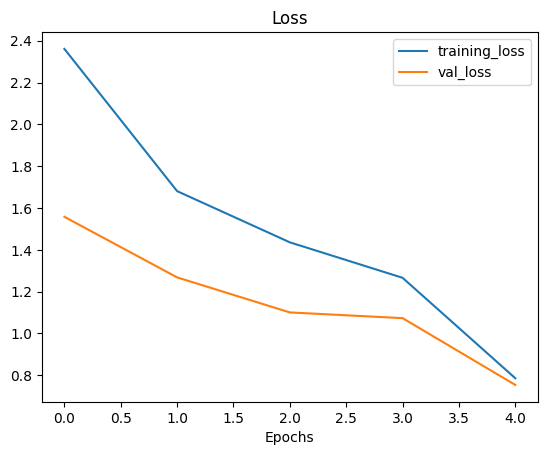

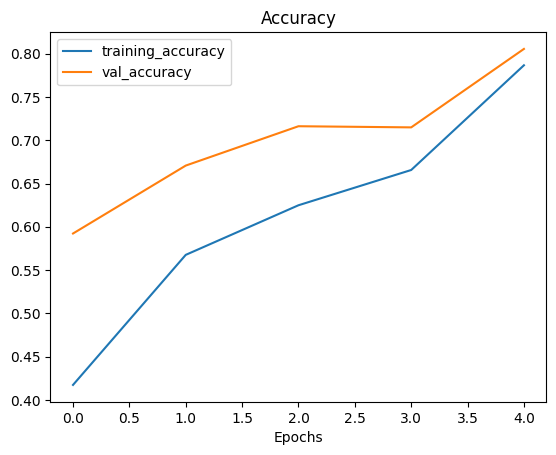

In [28]:
plot_loss_curves(history)

In [29]:
model.evaluate(test_data)

3157/3157 [==============================] - 87s 28ms/step - loss: 0.7513 - accuracy: 0.8044


[0.7513223886489868, 0.804435670375824]

In [30]:
model.save("models/model.hdf5")

/home/lol/miniconda3/envs/gpu/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
model.save_weights("weights/FinalModel_weights.hdf5")

## **Evaluating our Model**

In [32]:
pred_probs = model.predict(test_data, verbose=1)
len(pred_probs), pred_probs.shape

3157/3157 [==============================] - 80s 25ms/step


(25250, (25250, 101))

In [33]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10], len(pred_classes), pred_classes.shape

(array([ 29,  81,  91,  53,  97,  97,  10,  31,   3, 100]), 25250, (25250,))

In [34]:
# Getting true labels for the test_data

y_labels = []
test_images = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy())
y_labels[:10]

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

In [35]:
# Predicted Labels vs. True Labels
pred_classes==y_labels

array([ True,  True,  True, ..., False,  True, False])

### **Sklearn's Accuracy Score**

In [36]:
from sklearn.metrics import accuracy_score

sklearn_acc = accuracy_score(y_labels, pred_classes)
sklearn_acc 

0.8044356435643565

### **Confusion Matrix**
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

In [37]:
cm = tf.math.confusion_matrix(y_labels, pred_classes)

plt.figure(figsize = (200, 200));
sn.heatmap(cm, annot=True, 
           fmt='',
           cmap='Blues');

### **Model's Class-wise Accuracy Score**

In [38]:
from sklearn.metrics import classification_report
report = (classification_report(y_labels, pred_classes, output_dict=True))

In [39]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in report.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.5123152709359606,
 'baby_back_ribs': 0.7795918367346939,
 'baklava': 0.8685258964143426,
 'beef_carpaccio': 0.8683693516699411,
 'beef_tartare': 0.7586206896551724,
 'beet_salad': 0.7238493723849372,
 'beignets': 0.806282722513089,
 'bibimbap': 0.9042145593869731,
 'bread_pudding': 0.6132264529058116,
 'breakfast_burrito': 0.7394957983193278,
 'bruschetta': 0.7280701754385965,
 'caesar_salad': 0.861003861003861,
 'cannoli': 0.8554455445544554,
 'caprese_salad': 0.816793893129771,
 'carrot_cake': 0.7991543340380549,
 'ceviche': 0.6921348314606741,
 'cheesecake': 0.7039106145251397,
 'cheese_plate': 0.8530612244897959,
 'chicken_curry': 0.7660455486542443,
 'chicken_quesadilla': 0.7832699619771863,
 'chicken_wings': 0.8330058939096268,
 'chocolate_cake': 0.6949152542372882,
 'chocolate_mousse': 0.5669642857142857,
 'churros': 0.8808080808080808,
 'clam_chowder': 0.8582375478927203,
 'club_sandwich': 0.844,
 'crab_cakes': 0.766798418972332,
 'creme_brulee': 0.8871287128712

In [40]:
report_df = pd.DataFrame(class_f1_scores, index = ['f1-scores']).T

In [41]:
report_df = report_df.sort_values("f1-scores", ascending=True)

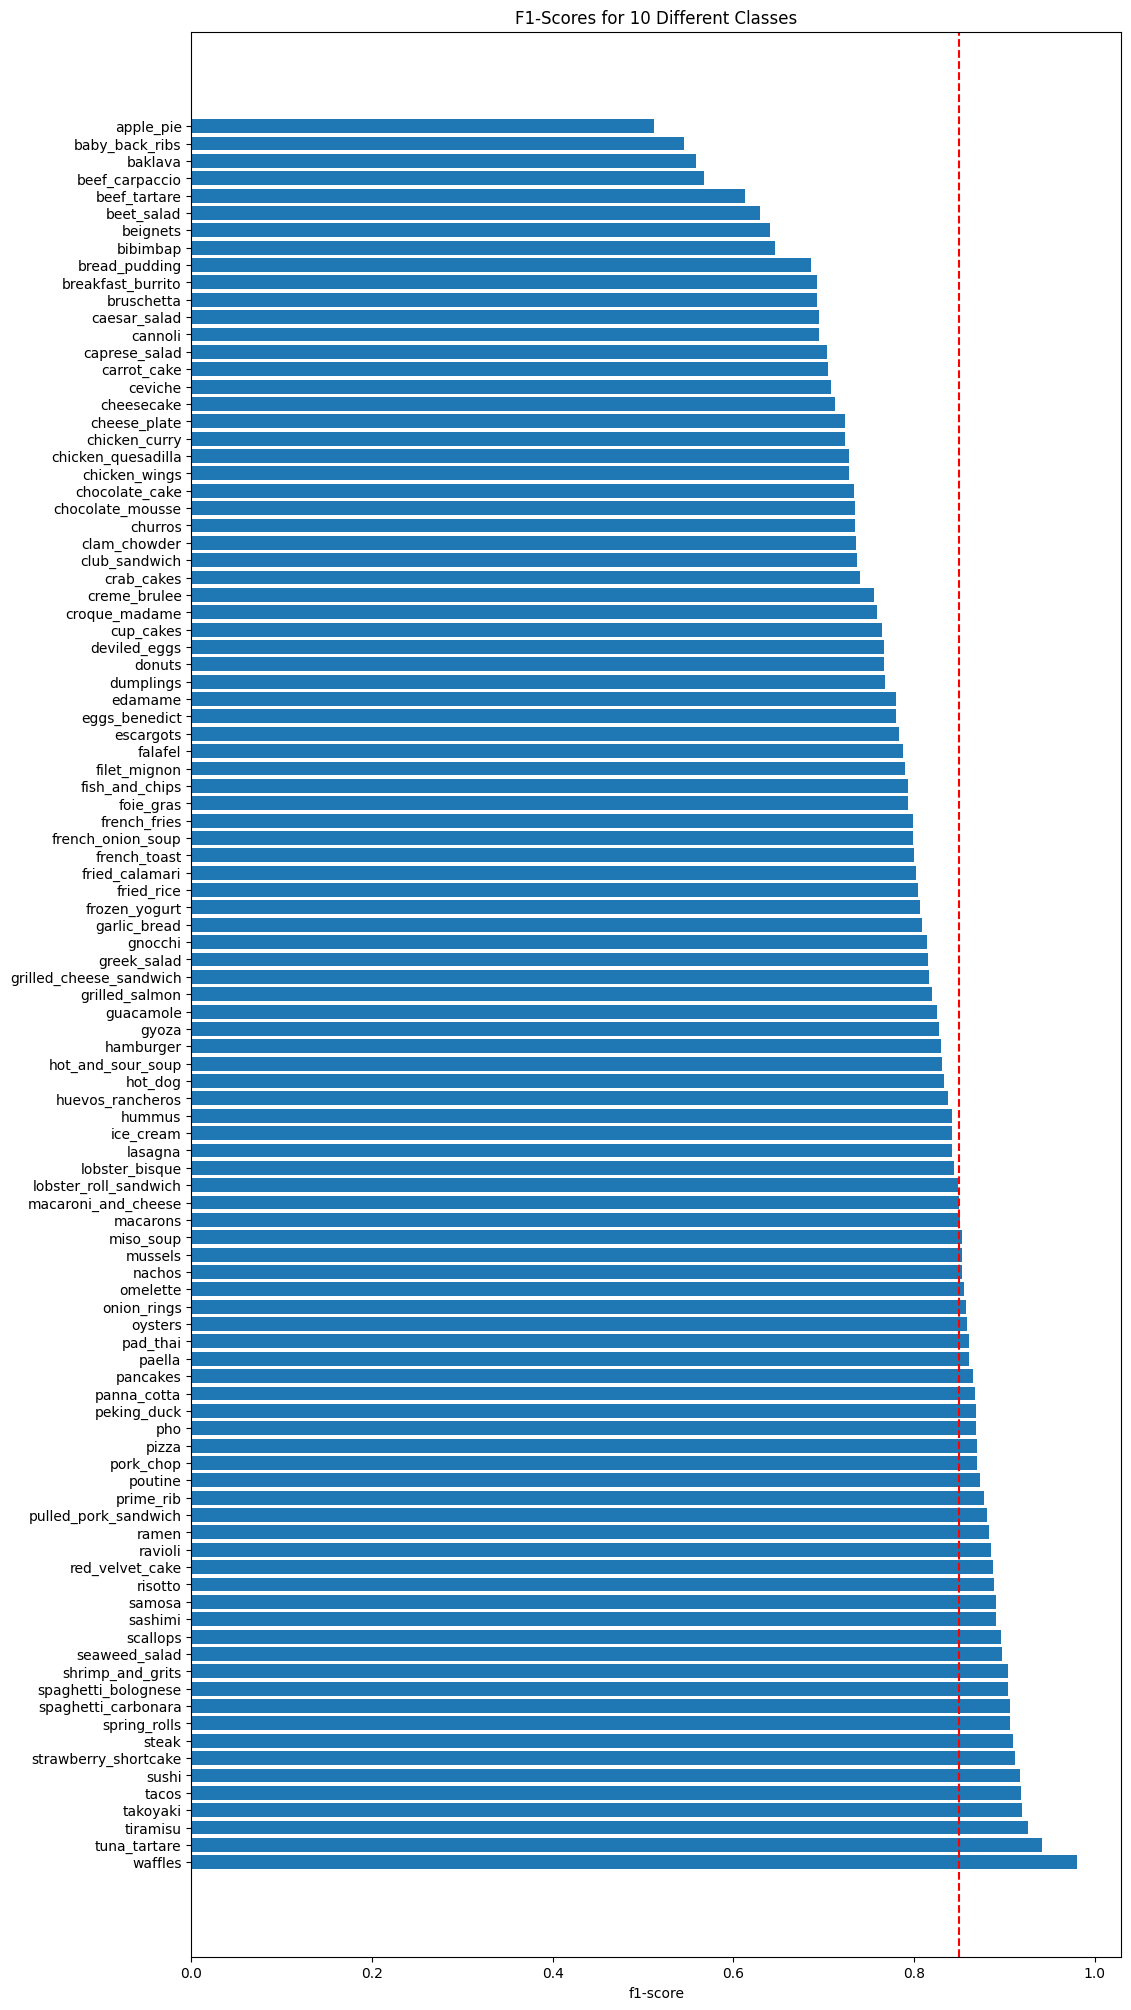

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(report_df)), report_df["f1-scores"].values)
ax.set_yticks(range(len(report_df)))
plt.axvline(x=0.85, linestyle='--', color='r')
ax.set_yticklabels(class_names)
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

### **Predicting on our own Custom images**

Once we have our model ready, its cruicial to evaluate it on our custom data : the data our model has never seen.

Training and evaluating a model on train and test data is cool, but making predictions on our own realtime images is another level.



In [43]:
# Get custom food images filepaths
import os

custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images/")]
custom_food_images

['custom_food_images/2057202.jpg',
 'custom_food_images/3140015.jpg',
 'custom_food_images/827575.jpg',
 'custom_food_images/Best-Indian-Punjabi-Samosa-Recipe.jpg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/desktop.ini',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/pizza-dad.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/Spring-Rolls-1284x1605.jpg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/sushi.jpeg']

In [56]:
def pred_plot_custom(folder_path):
    import os
    import matplotlib.pyplot as plt
    
    custom_food_images = [
        folder_path + img_path
        for img_path in os.listdir(folder_path)
        if img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))
    ]
    
    i = 0
    fig, a = plt.subplots(len(custom_food_images), 2, figsize=(15, 5 * len(custom_food_images)))
    
    for img_path in custom_food_images:
        img = load_and_prep_image(img_path, scale=False)
        
        if img is None:  # Skip invalid images
            print(f"Skipping invalid image: {img_path}")
            continue
        
        pred_prob = model.predict(tf.expand_dims(img, axis=0))
        pred_class = class_names[pred_prob.argmax()]
        top_5_i = pred_prob[0].argsort()[-5:][::-1]
        values = pred_prob[0][top_5_i]
        labels = [class_names[i] for i in top_5_i]

        # Plotting Image
        a[i][0].imshow(img / 255.0)
        a[i][0].set_title(f"Prediction: {pred_class}   Probability: {pred_prob.max():.2f}")
        a[i][0].axis(False)

        # Plotting Models Top 5 Predictions
        a[i][1].bar(labels, values, color='orange')
        a[i][1].set_title('Top 5 Predictions')
        
        i += 1
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 36ms/step


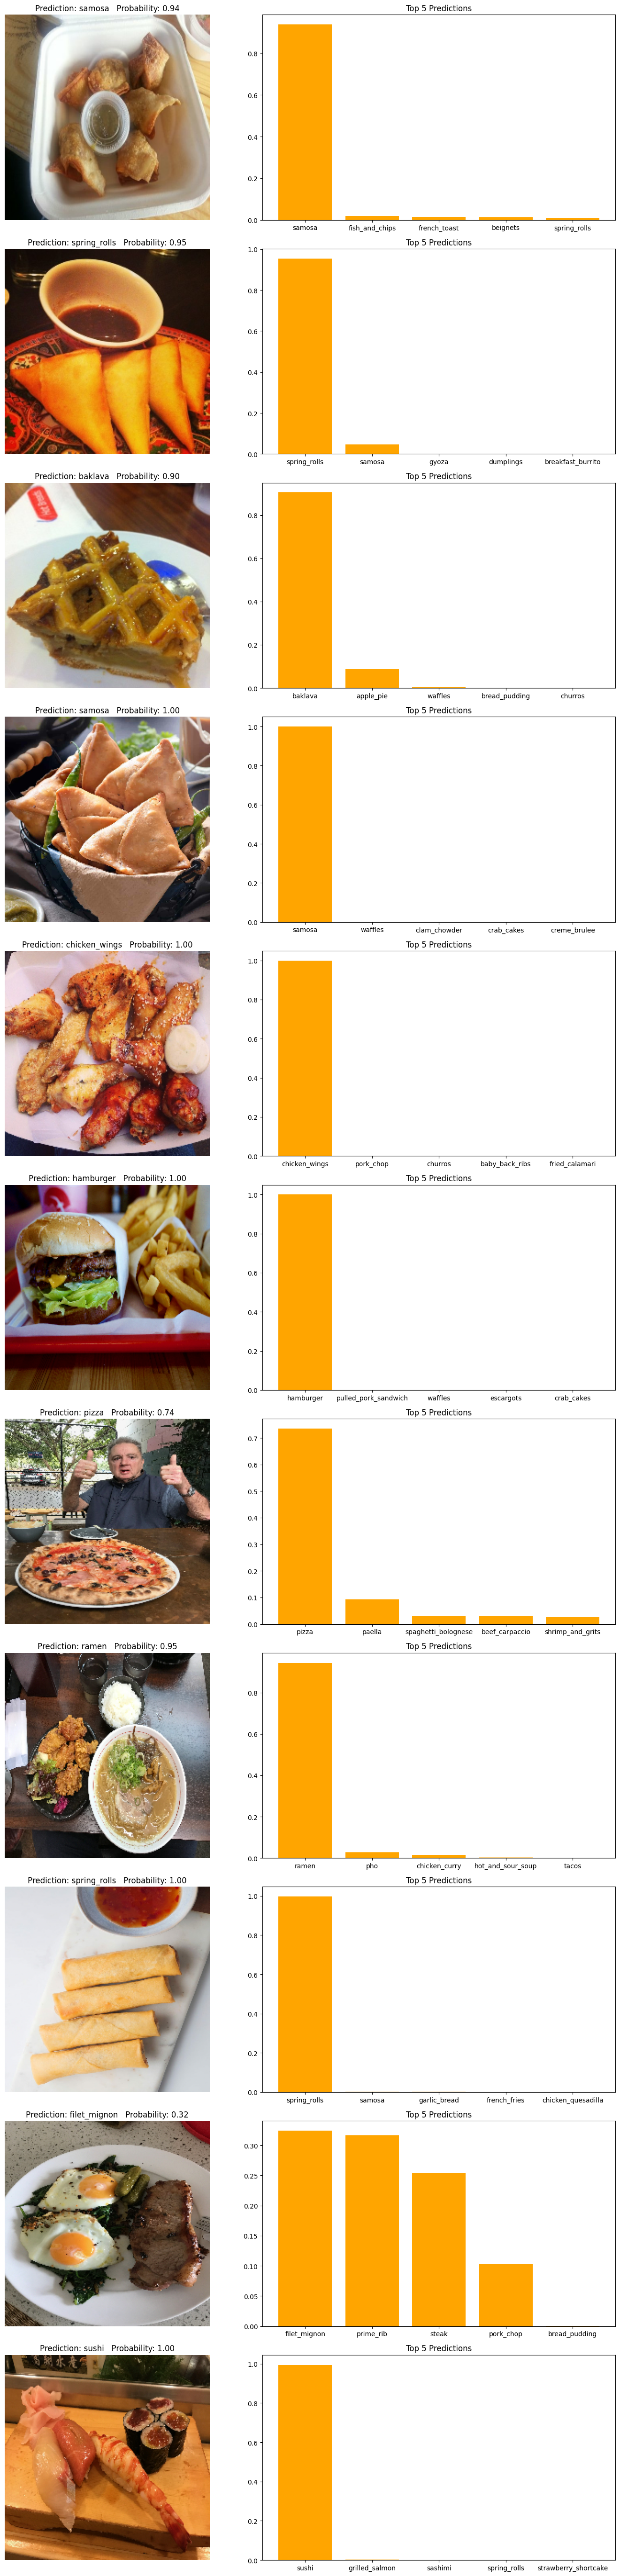

In [57]:
pred_plot_custom("custom_food_images/")